<h3 style="text-align:center; color:#333333">In the Name of God</h3>
<h3 style="text-align:right; color:#333333">FILE 2/2</h3>
<p style="text-align:left;"><span style="color:purple">Course: </span>Advanced DataMining | Dr. Khademi</p>
<p style="text-align:left;"><span style="color:purple">Project: </span>Persian POS Tagger</p>
<p style="text-align:left"><span style="color:purple">Student: </span>Ehsan Azami</p> 
<p style="text-align:left"><span style="color:purple">Presentation Date: </span>3, Khordad, 1400</p> 


<br>
<hr>
<br>

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
%matplotlib inline

<br><br><h2 style="text-align:center; color: darkred">CRISP: 2-Data Prepration Phase</h2>

<br><br><br>
<b>Read prepaird DataSet .csv file & build DataFrame<b>

In [22]:
df = pd.read_csv("dataset.csv", encoding='utf-8', low_memory=False)
df = df.drop('Unnamed: 0', axis="columns")
print(df.shape)
df.head()

(1048575, 16)


,input,label,word len,stem len,prefix len,suffix len,pre pos 1,pre pos 2,pre pos 3,nxt pos 1,nxt pos 2,nxt pos 3,suffix,suffix zamir,suffix exception,mokasar
0,اولین,ADJ,5,5,0,0,0,0,0,N,ADJ,P,0,0,0,0
1,سیاره,N,5,5,0,0,ADJ,0,0,ADJ,P,N,0,0,0,0
2,خارج,ADJ,4,4,0,0,N,ADJ,0,P,N,ADJ,0,0,0,0
3,از,P,2,2,0,0,ADJ,N,ADJ,N,ADJ,ADJ,0,0,0,0
4,منظومه,N,6,6,0,0,P,ADJ,N,ADJ,ADJ,V,0,0,0,0


<br><br><br>
<b>remove null field rows and input column<b>

In [23]:
#df.isna().sum()
df=df[~df['input'].isna()]
df = df.drop(['input'], axis='columns')

<br><br><br>
<b>Check feature datatypes, we should convert them to valid types<b>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048313 entries, 0 to 1048574
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   label             1048313 non-null  object
 1   word len          1048313 non-null  object
 2   stem len          1048313 non-null  object
 3   prefix len        1048313 non-null  object
 4   suffix len        1048313 non-null  object
 5   pre pos 1         1048313 non-null  object
 6   pre pos 2         1048313 non-null  object
 7   pre pos 3         1048313 non-null  object
 8   nxt pos 1         1048313 non-null  object
 9   nxt pos 2         1048313 non-null  object
 10  nxt pos 3         1048313 non-null  object
 11  suffix            1048313 non-null  object
 12  suffix zamir      1048313 non-null  object
 13  suffix exception  1048313 non-null  object
 14  mokasar           1048313 non-null  object
dtypes: object(15)
memory usage: 128.0+ MB


<br><br><br>
<b>Convert datatypes<b>

In [25]:
le_label = LabelEncoder()
le_pp1 = LabelEncoder()
le_pp2 = LabelEncoder()
le_pp3 = LabelEncoder()
le_np1 = LabelEncoder()
le_np2 = LabelEncoder()
le_np3 = LabelEncoder()

le_word_len = LabelEncoder()
le_stem_len = LabelEncoder()
le_prefix_len = LabelEncoder()
le_suffix_len = LabelEncoder()
le_suffix = LabelEncoder()
le_suffix_zamir = LabelEncoder()
le_suffix_exception = LabelEncoder()
le_mokasar = LabelEncoder()

df['pp1_n'] = le_pp1.fit_transform(df['pre pos 1'].astype(str))
df['pp2_n'] = le_pp2.fit_transform(df['pre pos 2'].astype(str))
#df['pp3_n'] = le_pp3.fit_transform(df['pre pos 3'].astype(str))
                                           
df['np1_n'] = le_np1.fit_transform(df['nxt pos 1'].astype(str))
df['np2_n'] = le_np1.fit_transform(df['nxt pos 2'].astype(str))
#df['np3_n'] = le_np1.fit_transform(df['nxt pos 3'].astype(str))

df['word_len'] = le_word_len.fit_transform(df['word len'].astype(str))
df['stem_len'] = le_stem_len.fit_transform(df['stem len'].astype(str))
#df['prefix_len'] = le_prefix_len.fit_transform(df['prefix len'].astype(str))
df['suffix_len'] = le_suffix_len.fit_transform(df['suffix len'].astype(str))
#df['suffix_new'] = le_suffix.fit_transform(df['suffix'].astype(str))
df['suffix_zamir'] = le_suffix_zamir.fit_transform(df['suffix zamir'].astype(str))
#df['suffix_exception'] = le_suffix_exception.fit_transform(df['suffix exception'].astype(str))
#df['mokasar_new'] = le_mokasar.fit_transform(df['mokasar'].astype(str))

le_lb = LabelEncoder()
temp = df['label']
df = df.drop(['label'], axis='columns')
df['label'] = le_pp3.fit_transform(temp.astype(str))
                                       
df = df.drop(['pre pos 1','pre pos 2','pre pos 3','nxt pos 1','nxt pos 2','nxt pos 3'
                 ,'word len','stem len','prefix len','suffix len','suffix','suffix zamir','suffix exception','mokasar'], axis='columns')

<br><br><br>
<b>Check feature datatypes again<b>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048313 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype
---  ------        --------------    -----
 0   pp1_n         1048313 non-null  int32
 1   pp2_n         1048313 non-null  int32
 2   np1_n         1048313 non-null  int32
 3   np2_n         1048313 non-null  int32
 4   word_len      1048313 non-null  int32
 5   stem_len      1048313 non-null  int32
 6   suffix_len    1048313 non-null  int32
 7   suffix_zamir  1048313 non-null  int32
 8   label         1048313 non-null  int32
dtypes: int32(9)
memory usage: 44.0 MB


<br><br><br>
<b>Check data correlation<b>

<AxesSubplot:>

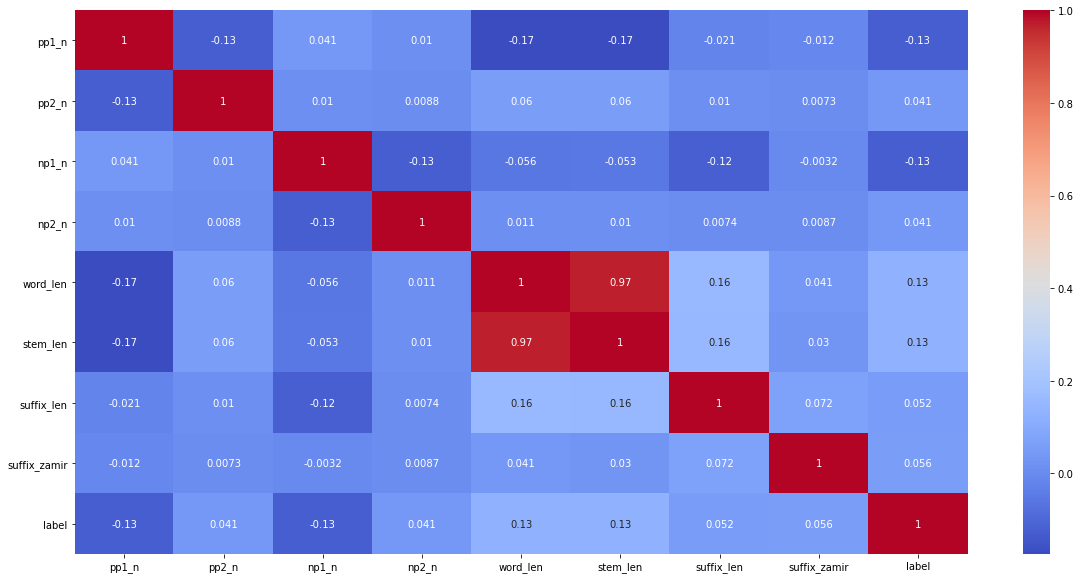

In [28]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<br><br><br>
<b>Seprate features and lable<b>

In [30]:
inputs = df.drop(['label'], axis='columns')
target = df['label']
print(inputs.shape)

(1048313, 8)


<br><br><br>
<h2 style="text-align:center; color: darkred">CRISP: 3,4-Modeling & Evaluation Phase</h2>

In [31]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

<br><br><br>
<b>Prepair Train & Test Data<b>

In [36]:
train = inputs[:30000]
target = target[:30000] 
X_train, X_test, Y_train, Y_test = train_test_split (train, target, random_state=101, stratify=target, test_size=0.10)

<br><br><br>
<h3 style="color:purple">Evaluation Decision Tree Model</h3>

In [40]:
model  = DecisionTreeClassifier(random_state=10)
model.fit(X_train, Y_train)
train_score = model.score(X_train,Y_train)
test_score = model.score(X_test,Y_test)
print("Train Score: " + str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.788
Test Score: 0.6003333333333334


<br>
<b>looking for best max_depth parameter<b>

In [56]:
train_accuracy = []
validation_accuracy = []
for depth in range(30,45):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, Y_train)
    train_accuracy.append(dt_model.score(X_train, Y_train))
    validation_accuracy.append(dt_model.score(X_test, Y_test))
frame = pd.DataFrame ({'max_depth': range(30,45), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,30,0.788,0.600333
1,31,0.788,0.600333
2,32,0.788,0.600333
3,33,0.788,0.600333
4,34,0.788,0.600333


<br><br><br>
<h3 style="color:purple">Evaluation K Nearest Neighbor Model</h3>

In [45]:
model_knn = KNeighborsClassifier(n_neighbors=29)
model_knn.fit(X_train, Y_train)
model_knn.score(X_train,Y_train)
train_score = model_knn.score(X_train,Y_train)
test_score = model_knn.score(X_test,Y_test)
print("Train Score: " + str(train_score))
print("Test Score: " + str(test_score))

Train Score: 0.6270740740740741
Test Score: 0.6256666666666667


<br>
<b>looking for best k parameter</b>

In [44]:
for k in range(28,30):
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, Y_train) 
    train_accuracy =model_knn.score(X_train,Y_train)
    test_accuracy =model_knn.score(X_test,Y_test)
    print(k)
    print(train_accuracy)
    print(test_accuracy)


28
0.6278518518518519
0.6213333333333333
29
0.6270740740740741
0.6256666666666667


<br><br><br>
<h3 style="color:purple">Evaluation for our best Model</h3>

In [51]:
pred = model_knn.predict(X_test)
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.46      0.17      0.25       259
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        63
           6       0.00      0.00      0.00        14
           7       1.00      0.67      0.80         3
           8       0.51      0.22      0.30       283
           9       0.00      0.00      0.00         1
          10       0.71      0.95      0.81       363
          11       0.40      0.20      0.27        60
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          16       0.62      0.82      0.70      1051
          20       0.58      0.85      0.69       321
          21       0.00    

C:\Users\Ehsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<br><br><br>
<h3 style="color:purple">Display graphical tree</h3>

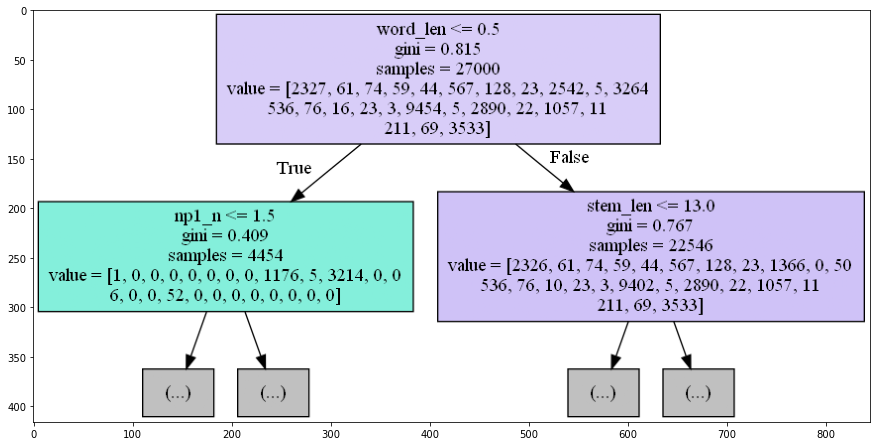

In [87]:
decision_tree = tree.export_graphviz(model, out_file='output/tree/tree.dot', feature_names=X_train.columns,max_depth=1, filled="True")
!dot -Tpng output/tree/tree.dot -o output/tree/tree.png
image = plt.imread('output/tree/tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<br><br><br>
<h3 style="color:purple">let's make some fun in prediction ;)</h3>

In [99]:
print("From train data:")
inputs[3:4]

From train data:


,pp1_n,pp2_n,np1_n,np2_n,word_len,stem_len,suffix_len,suffix_zamir
3,1,17,17,1,11,12,0,0


In [100]:
print("target: ")
target[3:4]

target: 


3    20
Name: label, dtype: int32

In [101]:
pred = model.predict([[1,17,17,1,11,12,0,0]])
print ("our prediction = " + str(pred))

our prediction = [20]


<br><br><br>
<h1 style="color:purple; text-align:center">Thank you for your attentions</h1>